In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#google API Key

api_key = "d90c9db6f0fd1762748598f3cf042e35"
api_key

'd90c9db6f0fd1762748598f3cf042e35'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['husavik',
 'carnarvon',
 'cape town',
 'punta arenas',
 'portland',
 'new norfolk',
 'cabo san lucas',
 'rikitea',
 'zarand',
 'champerico',
 'kavieng',
 'albany',
 'vardo',
 'knysna',
 'broome',
 'rocha',
 'ambodifototra',
 'ponta do sol',
 'shakawe',
 'ushuaia',
 'bone',
 'kangaba',
 'tuatapere',
 'samarai',
 'middelburg',
 'vaini',
 'mahebourg',
 'qaanaaq',
 'ostrovnoy',
 'san patricio',
 'tuktoyaktuk',
 'havre-saint-pierre',
 'barrow',
 'hambantota',
 'vila franca do campo',
 'saint-philippe',
 'luderitz',
 'severo-kurilsk',
 'butaritari',
 'pisco',
 'kapaa',
 'kodiak',
 'hohhot',
 'araouane',
 'umm lajj',
 'provideniya',
 'katsuura',
 'strezhevoy',
 'evensk',
 'mersing',
 'el cobre',
 'ixtapa',
 'marsa matruh',
 'kohlu',
 'nea alikarnassos',
 'rodrigues alves',
 'port hueneme',
 'yulara',
 'port macquarie',
 'isangel',
 'esperance',
 'ust-omchug',
 'gunib',
 'antofagasta',
 'rochegda',
 'bambous virieux',
 'saldanha',
 'saleaula',
 'mar del plata',
 'atuona',
 'ribeira grande',


## Perform API Calls

In [5]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ api_key  


# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #def renturCityURL(city):
    #return url + "&q=" + city
 
    #city_url= map(renturCityURL,cities)
    #list(city_url)
    city_url= url + "&q=" + city
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city_url))

    # Add 1 to the record count
    record_count += 1
    
    try:
        city_weather = requests.get(city_url).json()
    
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        city_data.append({"City": city,
                          'lat': city_lat,
                          'lng': city_lng,
                          'Temp': city_max_temp,
                          'Humid': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind': city_wind,
                          'Country': city_country,
                          'Date': city_data})
                    
    except:
        print("not found. Skip...")
        pass
    



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=husavik
Processing Record 2 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=carnarvon
Processing Record 3 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=cape town
Processing Record 4 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=punta arenas
Processing Record 5 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=portland
Processing Record 6 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=new norfolk
Processing Record 7 of Set 1 | http://api.openweathermap.org/data/2.5/weat

Processing Record 7 of Set 2 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=yulara
Processing Record 8 of Set 2 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=port macquarie
Processing Record 9 of Set 2 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=isangel
Processing Record 10 of Set 2 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=esperance
Processing Record 11 of Set 2 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=ust-omchug
Processing Record 12 of Set 2 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=gunib
Processing Record 13 of Set 2 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=a

Processing Record 13 of Set 3 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=ust-kuyga
Processing Record 14 of Set 3 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=khonsa
Processing Record 15 of Set 3 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=airai
Processing Record 16 of Set 3 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=jiquipilas
Processing Record 17 of Set 3 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=busselton
Processing Record 18 of Set 3 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=mwaya
not found. Skip...
Processing Record 19 of Set 3 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd176274859

Processing Record 21 of Set 4 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=tshikapa
Processing Record 22 of Set 4 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=rio bueno
Processing Record 23 of Set 4 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=lichinga
Processing Record 24 of Set 4 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=guican
Processing Record 25 of Set 4 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=babstovo
Processing Record 26 of Set 4 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=iqaluit
Processing Record 27 of Set 4 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=nam

Processing Record 27 of Set 5 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=vila
Processing Record 28 of Set 5 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=hennebont
Processing Record 29 of Set 5 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=guerrero negro
Processing Record 30 of Set 5 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=temaraia
not found. Skip...
Processing Record 31 of Set 5 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=cherskiy
Processing Record 32 of Set 5 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=tasiilaq
Processing Record 33 of Set 5 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd17

Processing Record 33 of Set 6 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=touros
Processing Record 34 of Set 6 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=arlit
Processing Record 35 of Set 6 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=ferme-neuve
Processing Record 36 of Set 6 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=roma
Processing Record 37 of Set 6 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=fuyang
Processing Record 38 of Set 6 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=rungata
not found. Skip...
Processing Record 39 of Set 6 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf

Processing Record 39 of Set 7 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=balaghat
Processing Record 40 of Set 7 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=bandarbeyla
Processing Record 41 of Set 7 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=tabanan
Processing Record 42 of Set 7 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=upata
Processing Record 43 of Set 7 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=santa maria
Processing Record 44 of Set 7 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=longyearbyen
Processing Record 45 of Set 7 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e

Processing Record 46 of Set 8 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=mbini
Processing Record 47 of Set 8 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=anuradhapura
Processing Record 48 of Set 8 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=agadez
Processing Record 49 of Set 8 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=kamenskoye
not found. Skip...
Processing Record 0 of Set 9 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=muzquiz
not found. Skip...
Processing Record 1 of Set 9 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=waipawa
Processing Record 2 of Set 9 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9

Processing Record 2 of Set 10 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=hirara
Processing Record 3 of Set 10 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=hvide sande
Processing Record 4 of Set 10 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=peto
Processing Record 5 of Set 10 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=normandin
Processing Record 6 of Set 10 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=sola
Processing Record 7 of Set 10 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=mayumba
Processing Record 8 of Set 10 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=mayo
Pro

Processing Record 8 of Set 11 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=sangar
Processing Record 9 of Set 11 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=le vauclin
Processing Record 10 of Set 11 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=tomatlan
Processing Record 11 of Set 11 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=ahuimanu
Processing Record 12 of Set 11 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=launceston
Processing Record 13 of Set 11 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=preobrazheniye
Processing Record 14 of Set 11 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f

Processing Record 14 of Set 12 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=nikolayevka
Processing Record 15 of Set 12 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=yeletskiy
not found. Skip...
Processing Record 16 of Set 12 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=ayan
Processing Record 17 of Set 12 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=arman
Processing Record 18 of Set 12 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=lysva
Processing Record 19 of Set 12 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=dingle
Processing Record 20 of Set 12 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd176274

Processing Record 20 of Set 13 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=mizan teferi
Processing Record 21 of Set 13 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=villanueva
Processing Record 22 of Set 13 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=langsa
Processing Record 23 of Set 13 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=richards bay
Processing Record 24 of Set 13 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=la asuncion
Processing Record 25 of Set 13 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd1762748598f3cf042e35&q=barmer
Processing Record 26 of Set 13 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d90c9db6f0fd17627485

In [15]:
# Convert JSON array into DataFrame
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["lat"]
temp = city_data_pd["Temp"]
wind = city_data_pd["Wind"]
humidity = city_data_pd["Humid"]
cloud =city_data_pd["Cloudiness"]

city_data_pd.count()

City          565
Cloudiness    565
Country       565
Date          565
Humid         565
Temp          565
Wind          565
lat           565
lng           565
dtype: int64

In [16]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humid,Temp,Wind,lat,lng
0,husavik,0,CA,"[{'City': 'husavik', 'lat': 50.56, 'lng': -96....",60,78.32,5.75,50.56,-96.99
1,carnarvon,12,ZA,"[{'City': 'husavik', 'lat': 50.56, 'lng': -96....",49,31.88,2.73,-30.97,22.13
2,cape town,0,ZA,"[{'City': 'husavik', 'lat': 50.56, 'lng': -96....",93,39.20,3.36,-33.93,18.42
3,punta arenas,40,CL,"[{'City': 'husavik', 'lat': 50.56, 'lng': -96....",98,32.00,28.86,-53.16,-70.91
4,portland,20,US,"[{'City': 'husavik', 'lat': 50.56, 'lng': -96....",26,98.60,5.82,45.52,-122.67


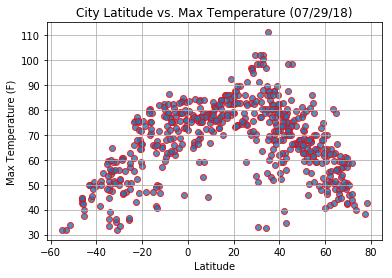

In [25]:
# latitude vs temperature
plt.scatter(lats, 
            temp,
            edgecolor="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

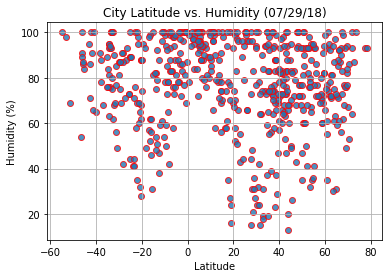

In [24]:
# humidity
plt.scatter(lats, 
            humidity,
            edgecolor="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

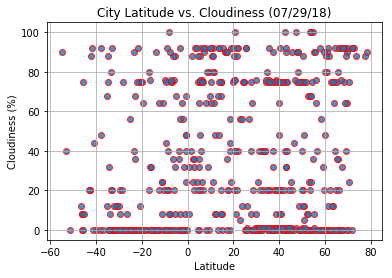

In [23]:
# cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

- Findings
1- The weather as expected gets hotter near the equator.
2- Humidity had no correlation vs latilude 
3- cloudiness also had no correlation vs latitude 